In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/CV/Lab6/
!ls

from IPython.display import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.exposure as ex
from skimage import restoration, transform, color, morphology, feature
from scipy import signal, ndimage
import math, graythresh

##Виявлення точок на зображенні

(<matplotlib.axes._subplots.AxesSubplot at 0x7f59c28cf0f0>,
 <matplotlib.image.AxesImage at 0x7f59c2899860>)

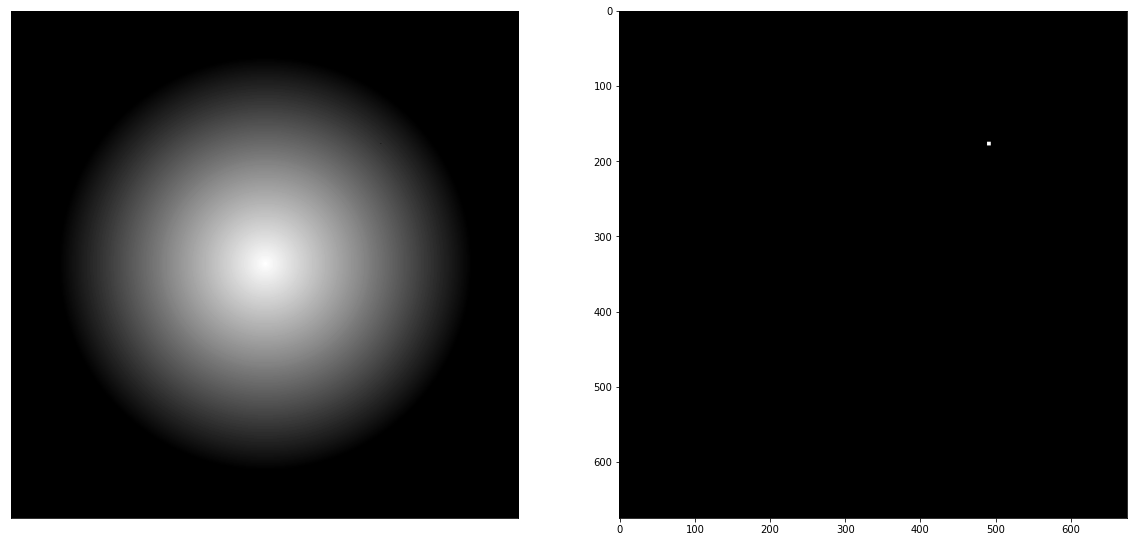

In [ ]:
pic1_orig = cv2.imread('pic.1.tif',0)
image1_np=np.array(pic1_orig)

kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

g = np.abs(signal.convolve2d(image1_np.astype('float32'), kernel, mode='same', boundary='fill', fillvalue=0))
T = np.max(g)
g = g >= T
g = morphology.binary_dilation(g, np.ones([5, 5]))

plt.figure(figsize = (20,20))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')
plt.subplot(1,2,2),  plt.imshow(g, cmap='gray')


(<matplotlib.axes._subplots.AxesSubplot at 0x7f506d698940>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f506d654e10>)

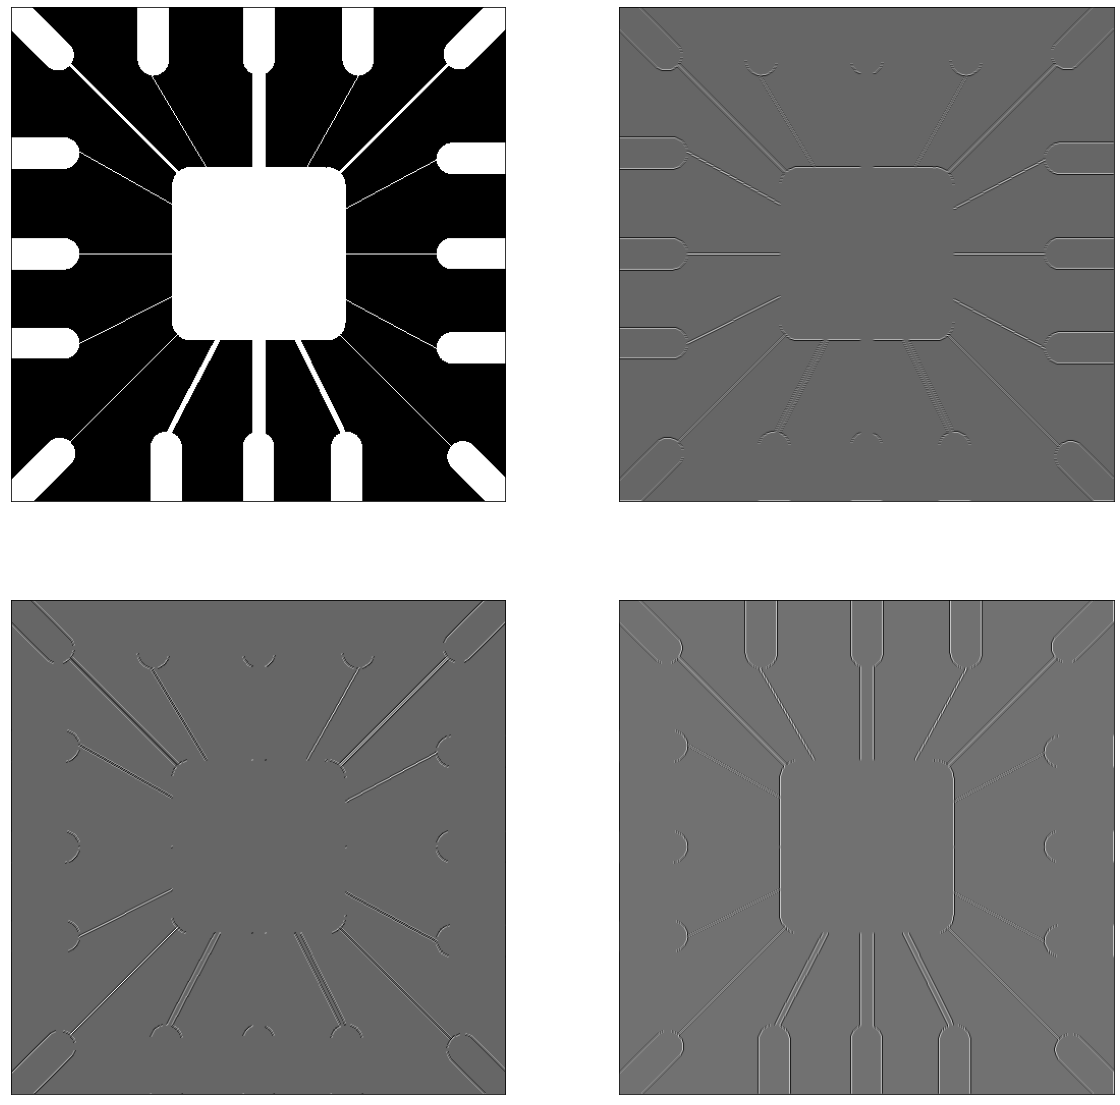

In [ ]:
pic2_orig = cv2.imread('pic.2.tif',0)
image2_np=np.array(pic2_orig)

kernel_horizont = np.array([[-1, -1, -1],
                            [2, 2, 2],
                            [-1, -1, -1]])

kernel_45 = np.array([[-1, -1, 2],
                      [-1, 2, -1],
                      [2, -1, -1]])

g_h = signal.convolve2d(image2_np, kernel_horizont, mode='same', boundary='fill', fillvalue=0)
g_45 = signal.convolve2d(image2_np, kernel_45, mode='same', boundary='fill', fillvalue=0)
g_v = signal.convolve2d(image2_np, kernel_horizont.T, mode='same', boundary='fill', fillvalue=0)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image2_np, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(g_h, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(g_45, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(g_v, cmap='gray')

##Виявлення границь

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff6272c5048>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7ff627282518>)

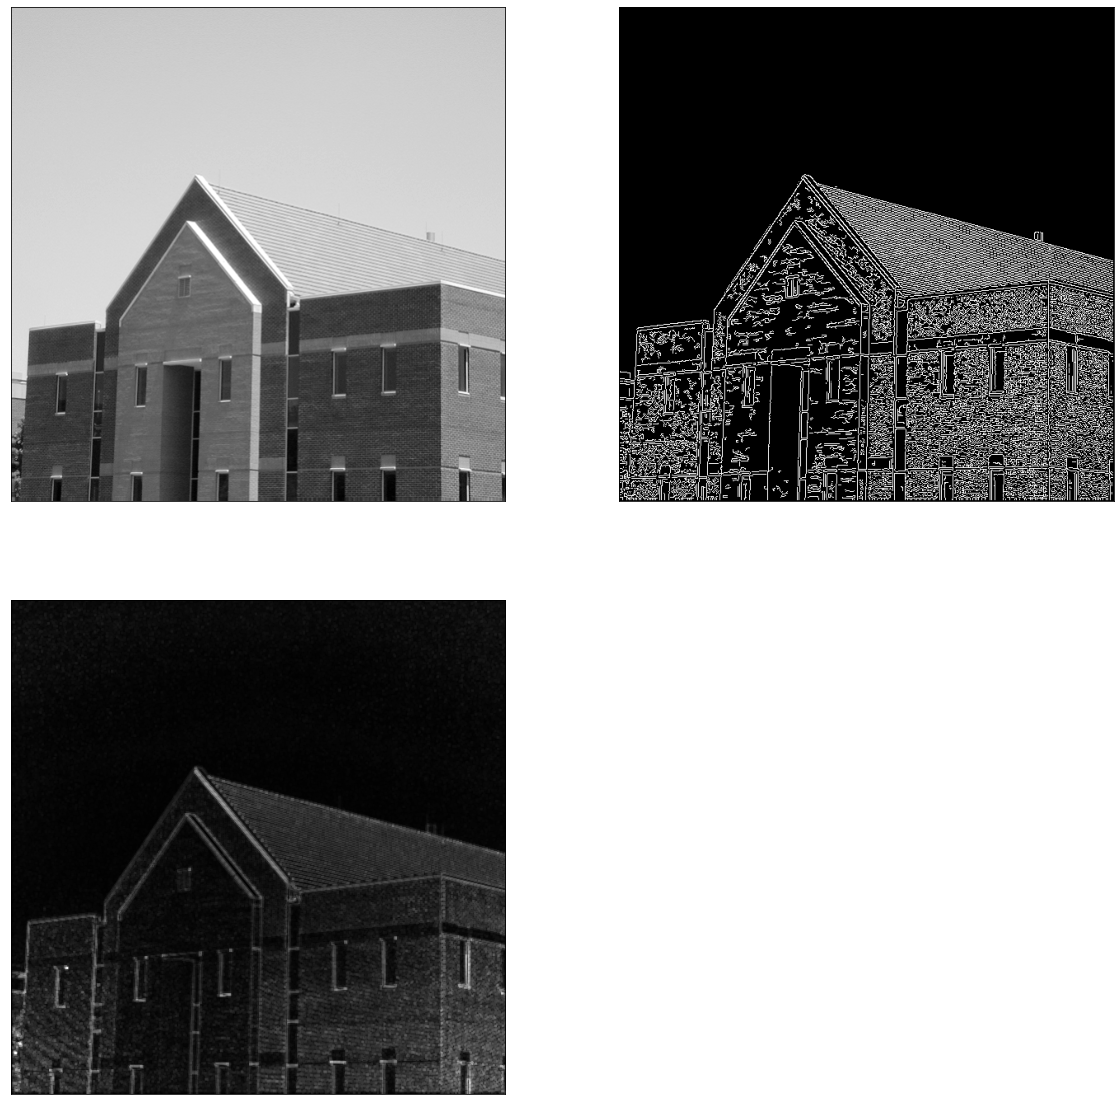

In [ ]:
pic3_orig = cv2.imread('pic.3.tif',0)
image3_np = np.array(pic3_orig)

g_Canny = feature.canny(image3_np, sigma=0)
g_LoG = graythresh.myLoG(image3_np, sigma=0, kappa = 0)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image3_np, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(g_Canny, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(g_LoG, cmap='gray')


##Обробка з глобальним/адаптивним порогом

 ----- T = 101.47169374733298
 ----- T2 = 101.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7ff73a89aa90>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7ff73a9022b0>)

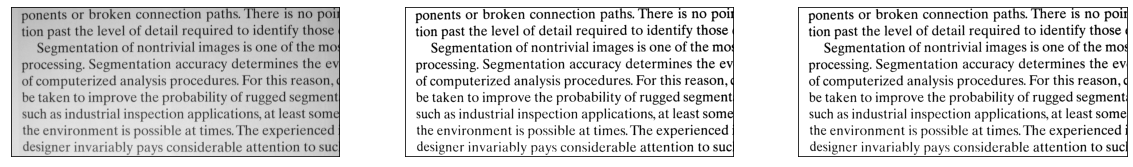

In [ ]:
pic4_orig = cv2.imread('pic.4.tif',0)
image4_np = np.array(pic4_orig)

T = 0.5 * (np.float32(np.min(image4_np)) + np.float32(np.max(image4_np)))
done = False
while (not done):
  g = (image4_np >= T)
  Tnext = 0.5 * (np.mean(image4_np[g]) + np.mean(image4_np[np.logical_not(g)]))
  done = np.abs(T - Tnext) < 0.5
  T = Tnext
g_global = image4_np > T

T2 = 255 * graythresh.graythresh(image4_np)
g_adapt = image4_np > T2

print (" ----- T = " + str(T) + "\n ----- T2 = " + str(T2))
plt.figure(figsize = (20,20))
plt.subplot(1,3,1), plt.xticks([]), plt.yticks([]), plt.imshow(image4_np, cmap='gray')
plt.subplot(1,3,2), plt.xticks([]), plt.yticks([]), plt.imshow(g_global, cmap='gray')
plt.subplot(1,3,3), plt.xticks([]), plt.yticks([]), plt.imshow(g_adapt, cmap='gray')


##Сегментація за вододілами шляхом перетворення відстані

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9dbadf6b70>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f9dba9be898>)

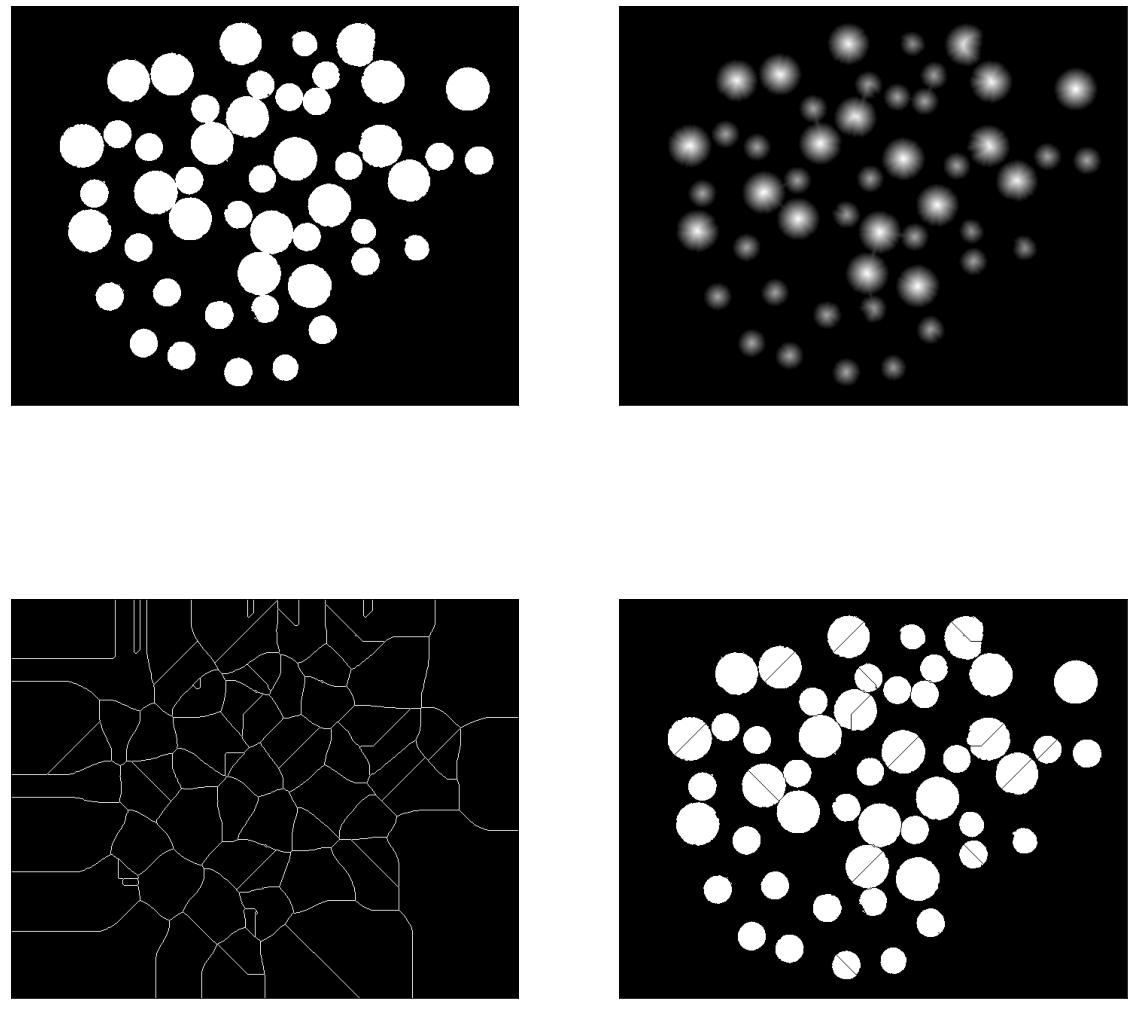

In [ ]:
pic5_orig = cv2.imread('pic.5.tif',0)
pic5_binary = cv2.threshold(pic5_orig, 128, 255, cv2.THRESH_BINARY)[1]
pic5_binary[pic5_binary>1] = 1
pic5_binary[pic5_binary<0] = 0

D = ndimage.distance_transform_edt(pic5_binary)
L = morphology.watershed(-D, watershed_line=True)
w = (L == 0)
g2 = (np.logical_and(pic5_binary, np.logical_not(w)));

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic5_binary, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(D, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(w, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(g2, cmap='gray')

##Сегментація за вододілами за допомогою градієнтів

(<matplotlib.axes._subplots.AxesSubplot at 0x7f59c2067b38>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f59c202ec50>)

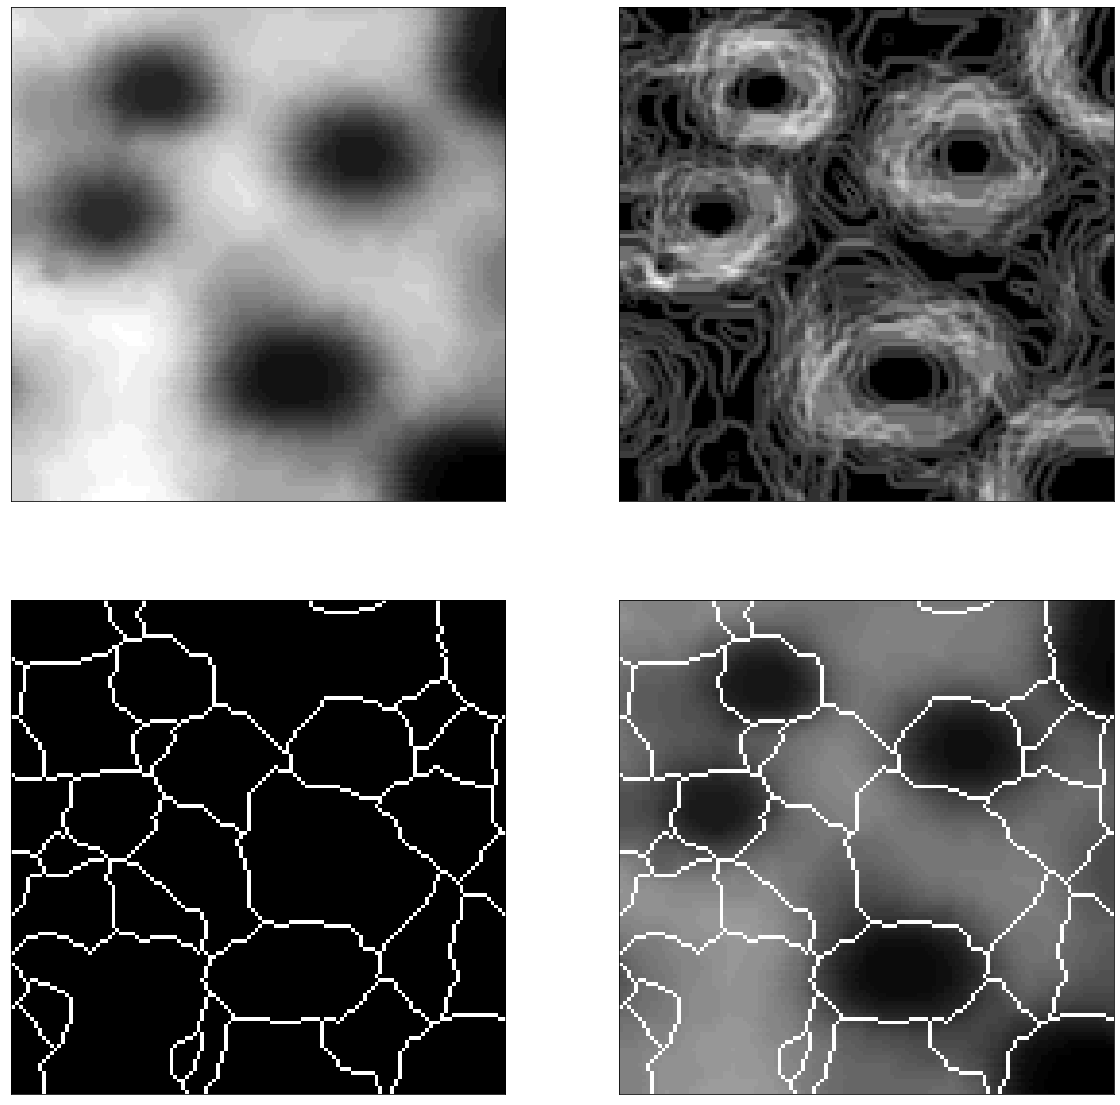

In [ ]:
pic6_orig = cv2.imread('pic.6.tif',0)
image6_np = np.array(pic6_orig)

Gx = np.array([[-1, 0, 1],
	             [-2, 0, 2],
	             [-1, 0, 1]])
pic6_Gx = signal.convolve2d(pic6_orig, Gx, mode='same', boundary='symm')
pic6_Gy = signal.convolve2d(pic6_orig, Gx.T, mode='same', boundary='symm')
g1 = np.sqrt(pic6_Gx**2 + pic6_Gy**2)

n = 4
g2  = morphology.opening(g1, np.ones([n,n]))
g2  = morphology.closing(g2, np.ones([n,n]))
L2 = morphology.watershed(g2, watershed_line=True)
wr2 = (L2 == 0)
image6_np[wr2] = 255

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic6_orig, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(g1, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(wr2, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(image6_np, cmap='gray')

##Cегментація за допомогою кластеризації по k-середніх

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff73b0f3668>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7ff73d10bba8>)

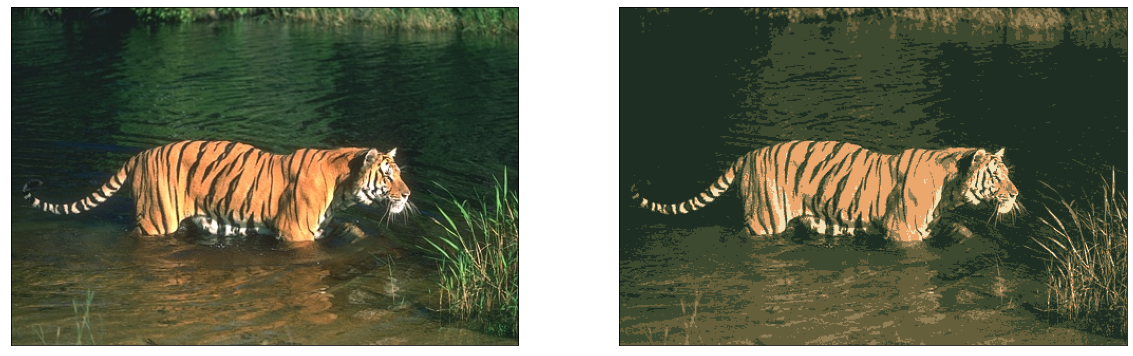

In [ ]:
pic8_orig = cv2.imread('pic.8.jpg',1)
pic8_orig = cv2.cvtColor(pic8_orig, cv2.COLOR_BGR2RGB)
image8_np = np.array(pic8_orig)

nSeg = 6
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

nrows, ncols, c = np.shape(image8_np)
data = np.float32(np.reshape(image8_np, (nrows * ncols, c)))

ret,label,center = cv2.kmeans(data, nSeg, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((pic8_orig.shape))

plt.figure(figsize = (20,20))
plt.subplot(1,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(image8_np)
plt.subplot(1,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(res2)